In [1]:
# Preamble, notebook setup and imports

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import plot_utils

In [16]:
tfs = pd.read_csv('/home/rapiduser/programs/RoboCOP/analysis/inputs/MacIsaac_sacCer3_liftOver_Abf1_Reb1.bed',sep = '\t', header = None)
tfs = tfs.rename(columns = {0: 'chr', 1: 'start', 2: 'end', 3: 'tf_name', 4: 'score', 5: 'strand'})
tfs['pos'] = tfs['start']
tfs

,chr,start,end,tf_name,score,strand,pos
0,chrI,45319,45332,ABF1,0,-,45319
1,chrI,45499,45512,ABF1,0,-,45499
2,chrI,61164,61177,ABF1,0,-,61164
3,chrI,62658,62671,ABF1,0,-,62658
4,chrI,87163,87171,REB1,0,+,87163
...,...,...,...,...,...,...,...
302,chrXVI,736821,736834,ABF1,0,+,736821
303,chrXVI,770866,770874,REB1,0,+,770866
304,chrXVI,792552,792565,ABF1,0,-,792552
305,chrXVI,870538,870546,REB1,0,-,870538


In [21]:
tfs_positive = tfs.loc[tfs['strand'] == '+']
tfs_positive_abf1 = tfs_positive.loc[tfs_positive['tf_name'] == 'ABF1']
tfs_negative = tfs.loc[tfs['strand'] == '-']
tfs_negative_abf1 = tfs_negative.loc[tfs_negative['tf_name'] == 'ABF1']


tfs_positive_abf1

,chr,start,end,tf_name,score,strand,pos
11,chrII,297938,297951,ABF1,0,+,297938
13,chrII,401011,401024,ABF1,0,+,401011
18,chrII,495468,495481,ABF1,0,+,495468
23,chrII,647324,647337,ABF1,0,+,647324
25,chrII,770734,770747,ABF1,0,+,770734
...,...,...,...,...,...,...,...
284,chrXV,817136,817149,ABF1,0,+,817136
286,chrXV,898520,898533,ABF1,0,+,898520
294,chrXVI,251909,251922,ABF1,0,+,251909
296,chrXVI,529476,529489,ABF1,0,+,529476


/home/rapiduser/miniconda3/envs/bob/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


(   0  1  2  3  4  5  6  7  8  9   ... 31 32 33 34 35 36 37 38 39 40
 0   A  A  A  A  T  T  T  T  C  A  ...  G  A  C  T  G  T  C  A  A  A
 1   C  T  C  G  A  A  A  T  T  T  ...  G  A  T  A  C  C  G  A  A  T
 2   A  C  A  T  T  A  T  A  G  T  ...  G  A  C  C  G  A  A  A  G  T
 3   G  G  A  T  A  C  A  C  C  A  ...  G  A  T  A  A  A  A  T  A  T
 4   C  T  C  T  T  T  T  C  T  T  ...  G  A  T  A  C  A  G  A  T  C
 .. .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
 72  A  A  C  T  T  T  A  G  T  A  ...  G  A  T  T  A  G  G  A  A  T
 73  A  T  T  T  C  T  T  T  T  T  ...  G  A  T  A  T  C  A  A  T  A
 74  G  A  C  A  G  A  A  T  A  G  ...  G  A  T  A  A  A  A  G  G  C
 75  G  G  T  G  T  A  C  T  A  T  ...  G  A  T  A  G  A  T  G  A  T
 76  G  T  A  A  T  T  T  C  C  A  ...  G  A  T  A  G  T  A  T  G  G
 
 [77 rows x 41 columns],
          0         1         2         3         4         5         6   \
 A  0.363636  0.350649  0.272727  0.389610  0.311688  0.311688  0.311

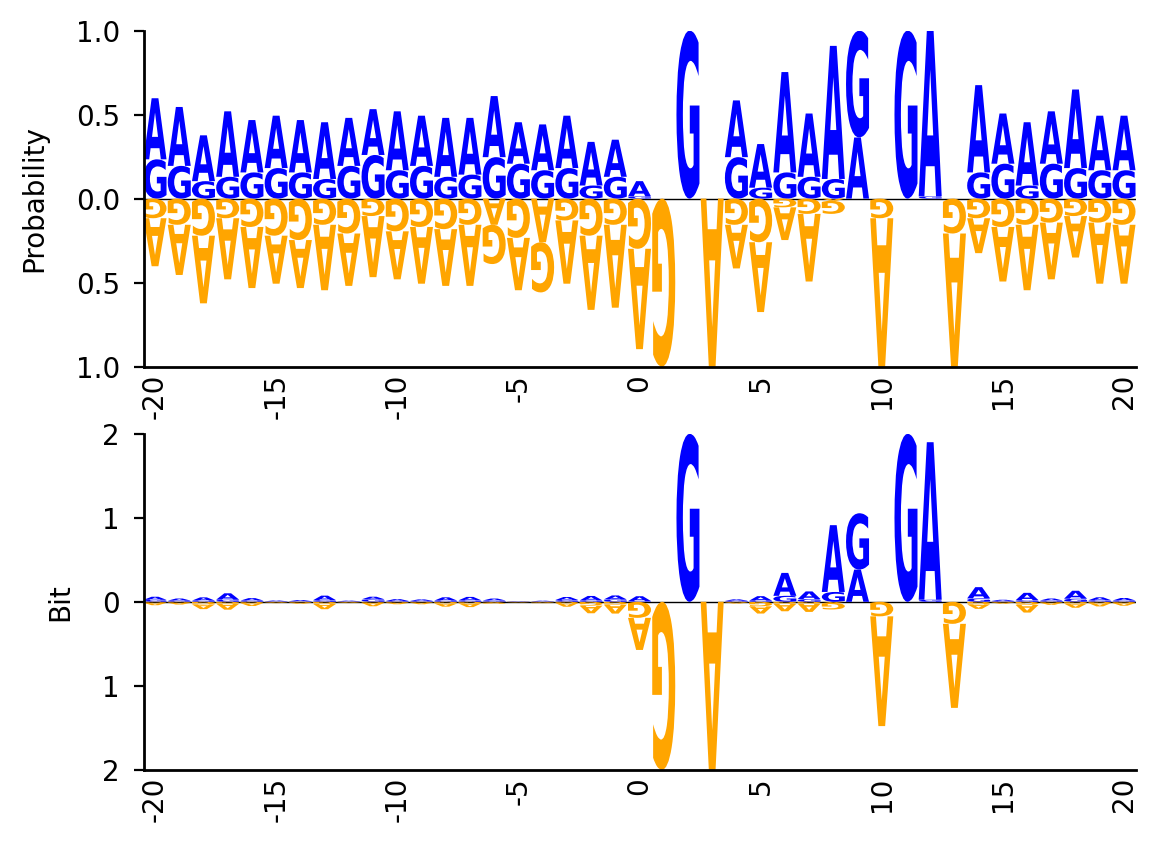

In [22]:
fig, ax = plt.subplot_mosaic("""AAA
                                 BBB""")

plot_utils.plot_motif_logo('/home/rapiduser/programs/RoboCOP/analysis/inputs/SacCer3.fa',tfs_positive_abf1,40,0,ax['A'],ax['B'],'roman')

/home/rapiduser/miniconda3/envs/bob/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


(   0  1  2  3  4  5  6  7  8  9   ... 31 32 33 34 35 36 37 38 39 40
 0   C  A  G  A  A  A  A  A  A  A  ...  A  C  G  G  C  A  T  G  T  C
 1   A  C  A  C  G  T  G  C  C  A  ...  A  C  G  T  A  T  G  T  G  C
 2   A  A  C  T  T  T  T  C  A  C  ...  A  C  G  A  C  T  T  G  A  A
 3   T  A  T  A  T  C  A  C  T  A  ...  A  C  G  A  T  A  A  T  C  G
 4   T  G  T  C  C  A  A  T  A  A  ...  A  C  G  A  G  A  T  A  T  T
 .. .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
 69  C  C  A  T  A  A  C  A  T  C  ...  A  C  G  A  G  T  T  T  T  G
 70  T  G  C  T  A  T  T  A  A  T  ...  A  C  G  A  A  A  T  A  A  A
 71  A  A  T  T  A  A  A  A  T  G  ...  A  C  G  A  C  A  A  T  G  A
 72  T  C  A  G  T  C  C  A  G  T  ...  A  C  G  G  T  G  G  A  A  A
 73  A  C  T  A  T  C  G  C  T  A  ...  A  C  G  G  A  A  A  T  G  T
 
 [74 rows x 41 columns],
          0         1         2         3         4         5         6   \
 A  0.351351  0.310811  0.337838  0.297297  0.310811  0.351351  0.256

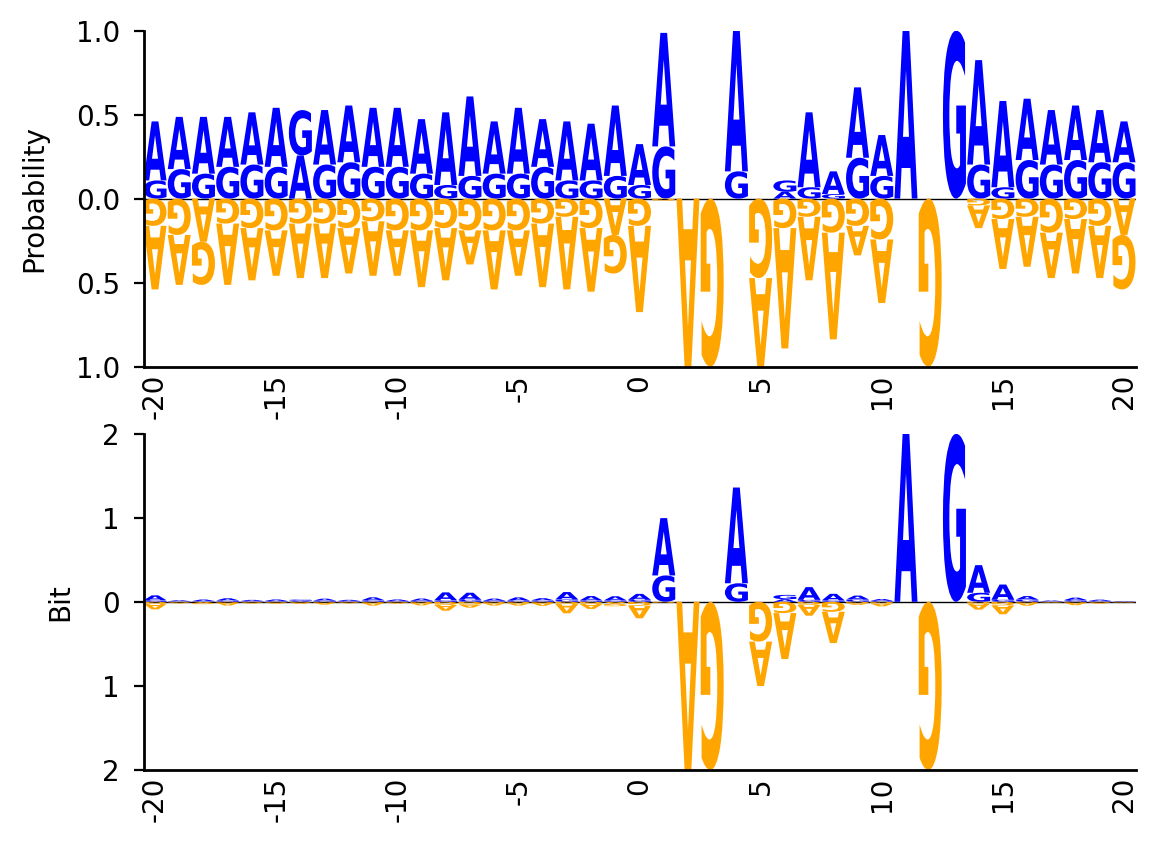

In [23]:
fig, ax = plt.subplot_mosaic("""AAA
                                 BBB""")

plot_utils.plot_motif_logo('/home/rapiduser/programs/RoboCOP/analysis/inputs/SacCer3.fa',tfs_negative_abf1,40,0,ax['A'],ax['B'],'roman')